# Is my model better than predicting the mean?

It is easy to be convinced that a model is good if it has a low error.

But it is always a good idea to compare your model to a baseline, to see if it is actually better than just predicting the mean.

This can be done easily in `modelskill` thanks to the `DummyModelResult` class.


In [1]:
import modelskill as ms

fn = '../tests/testdata/Oresund2D.dfsu'
mr = ms.model_result(fn, item='Surface elevation')
mr

<DfsuModelResult> 'Oresund2D'

In [2]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
obs = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0)
obs


PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6

In [3]:
dmr = ms.DummyModelResult(data=0.0)
dmr

DummyModelResult(name='dummy', data=0.0, strategy='constant')

In [4]:
cmp = ms.match(obs=obs, mod=[mr, dmr]).remove_bias()
cmp.skill().round(3)

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
Oresund2D,smhi_2095_klagshamn,167,-0.0,0.041,0.041,0.033,0.838,0.379,0.702
dummy,smhi_2095_klagshamn,167,-0.0,0.075,0.075,0.061,-0.000,0.695,0.000


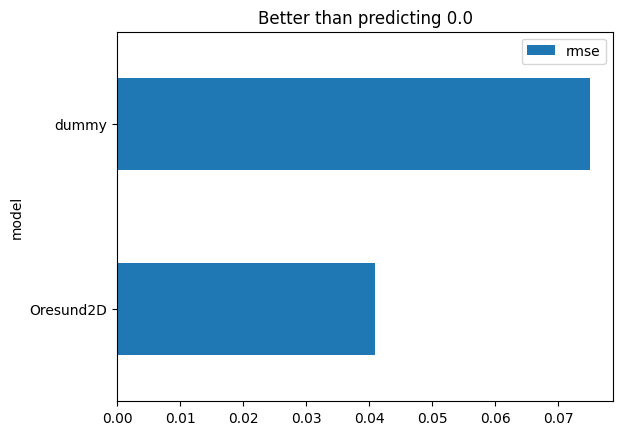

In [5]:
cmp.skill().rmse.plot.barh(title="Better than predicting 0.0");

Above we created a DummyModelResult which always predicts 0.0.

But we can be even more lazy and just use the `DummyModelResult` with the `mean` strategy, which will predict the mean of the observed values.

In [6]:
dmr2 = ms.DummyModelResult(strategy='mean')
dmr2

DummyModelResult(name='dummy', data=None, strategy='mean')

In [7]:
cmp2 = ms.match(obs=obs, mod=[mr, dmr2]).remove_bias()
cmp2.skill().round(3)

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
Oresund2D,smhi_2095_klagshamn,167,-0.0,0.041,0.041,0.033,0.838,0.379,0.702
dummy,smhi_2095_klagshamn,167,-0.0,0.075,0.075,0.061,0.000,0.695,0.000
